## Dataset
Pokemon images for classification

https://www.kaggle.com/datasets/lantian773030/pokemonclassification

In [1]:
import tensorflow as tf
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb, gray2rgb
from models import AutoEncoder_VGG16,Decoder
import cv2

In [2]:
input_shape=(224,224,3)

model=AutoEncoder_VGG16(input_shape)
AutoEncoder_model = tf.keras.models.load_model('Autoencoder_VGG16.hdf5',custom_objects=None,compile=False)

In [3]:
def plot_result(x):
    
    test = img_to_array(load_img(test_img[x]))/255
    test = resize(test, (224,224), anti_aliasing=True)
    lab = rgb2lab(test)
    l = lab[:,:,0]/100
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    features = model.predict(L)
    ab = AutoEncoder_model.predict(features)
    ab = ab*128
    Image = np.zeros((224, 224, 3))
    Image[:,:,0] = lab[:,:,0]
    Image[:,:,1:] = ab
    F_img=lab2rgb(Image)
    
    return F_img

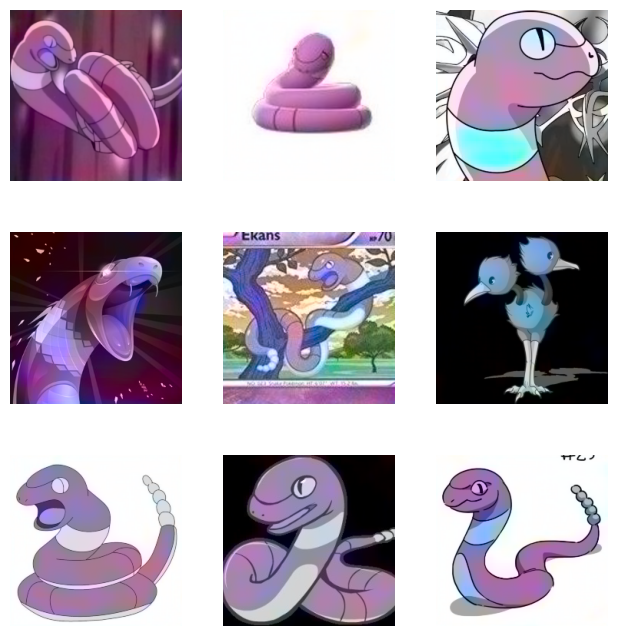

In [4]:
test_img=glob.glob('./Data/test/*.*')

num = random.randint(0, len(test_img))
plt.figure(figsize = (8 ,8))
for i in range(9):
    plt.subplot(3 , 3, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
    plt.imshow(plot_result(num+i))
    plt.axis('off')